INICIANDO PROJETO: SEGMENTAÇÃO DE CLIENTES (CLUSTERING)
DESCRIÇÃO DO PROBLEMA:
O objetivo é agrupar clientes de um shopping com base em duas variáveis:
1. Renda Anual (em milhares)
2. Score de Gastos (1-100)
A finalidade é identificar perfis de consumo para marketing direcionado.
--------------------------------------------------------------------------------

[ETL] Gerando dados fictícios e tratando...
[ETL] Dados gerados e padronizados com sucesso. Amostra:
   Renda_Anual_k  Score_Gastos
0      27.483571     18.617357
1      28.238443     35.230299
2      23.829233     17.658630
3      32.896064     27.674347
4      22.652628     25.425600
--------------------------------------------------------------------------------

[MODELAGEM] Treinando K-Means e Hierarchical Clustering...
[VISUALIZAÇÃO] Gerando gráficos...


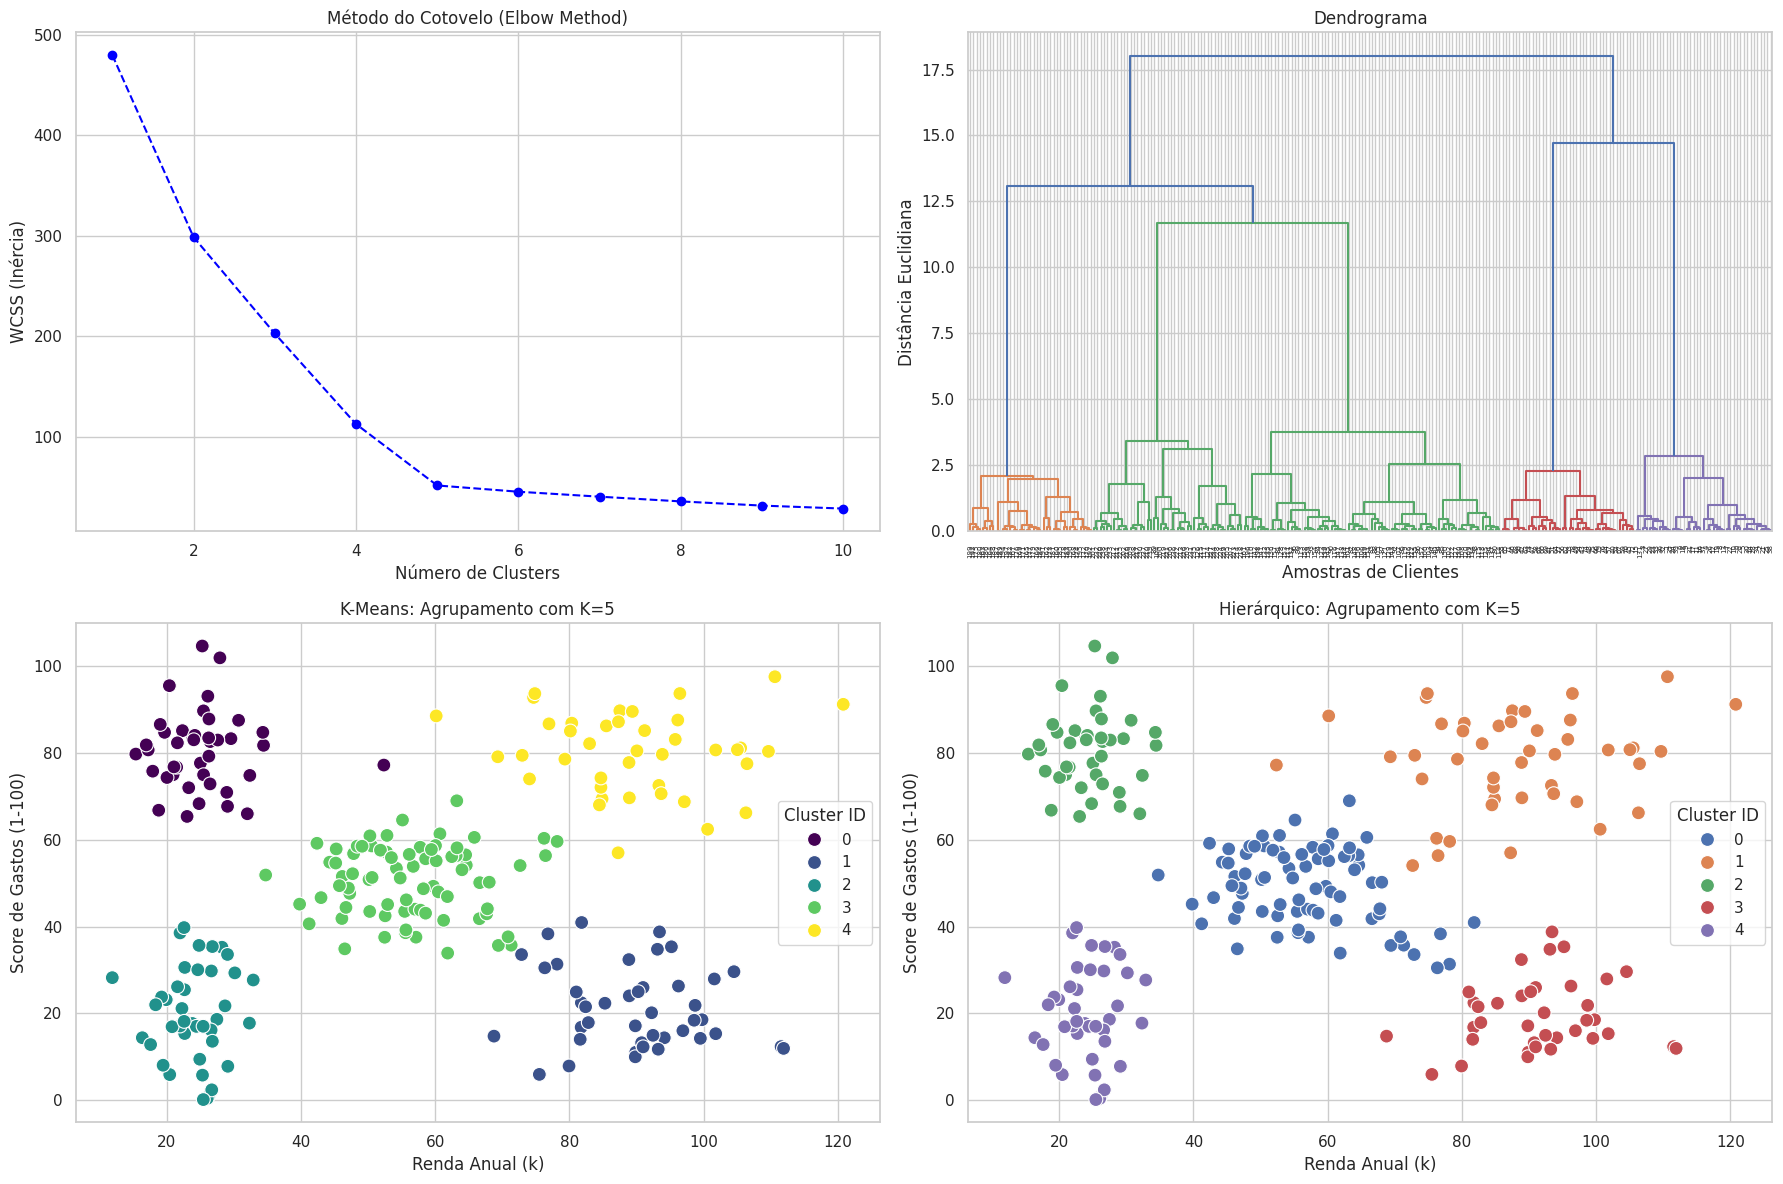

ANÁLISE E INTERPRETAÇÃO DOS RESULTADOS
Ambos os modelos convergiram para 5 grupos distintos de comportamento:

1. GRUPO ECONÔMICO: Baixa Renda e Baixo Gasto.
   -> Estratégia: Promoções de valor e cupons.

2. GRUPO IMPULSIVO: Baixa Renda e Alto Gasto.
   -> Estratégia: Oferecer parcelamento e crédito.

3. GRUPO PADRÃO (MASSA): Renda Média e Gasto Médio.
   -> Estratégia: Programas de fidelidade padrão.

4. GRUPO POUPADOR: Alta Renda e Baixo Gasto.
   -> Estratégia: Campanhas de produtos exclusivos para estimular consumo.

5. GRUPO VIP: Alta Renda e Alto Gasto.
   -> Estratégia: Atendimento VIP, concierge e produtos de luxo.

CONCLUSÃO: O K-Means e o Agrupamento Hierárquico apresentaram resultados
visuais quase idênticos, validando a consistência da segmentação.


In [2]:
# ==============================================================================
# PROJETO INDIVIDUAL (PI2) - APRENDIZADO NÃO SUPERVISIONADO
# TEMA: Segmentação de Clientes de Shopping Center
# ALGORITMOS: K-Means e Hierarchical Clustering
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Configuração de estilo dos gráficos
sns.set(style="whitegrid")

# ==============================================================================
# 1. DESCRIÇÃO DO PROBLEMA (Requisito 1)
# ==============================================================================
print("="*80)
print("INICIANDO PROJETO: SEGMENTAÇÃO DE CLIENTES (CLUSTERING)")
print("="*80)
print("DESCRIÇÃO DO PROBLEMA:")
print("O objetivo é agrupar clientes de um shopping com base em duas variáveis:")
print("1. Renda Anual (em milhares)")
print("2. Score de Gastos (1-100)")
print("A finalidade é identificar perfis de consumo para marketing direcionado.")
print("-" * 80)

# ==============================================================================
# 2. GERAÇÃO DE DADOS E ETL (Requisito 2)
# ==============================================================================
print("\n[ETL] Gerando dados fictícios e tratando...")

# Geração de dados (Simulando a Importação)
np.random.seed(42)
# Grupo A: Econômicos (Baixa Renda, Baixo Gasto)
grupo_a = np.random.normal(loc=[25, 20], scale=[5, 10], size=(40, 2))
# Grupo B: Impulsivos (Baixa Renda, Alto Gasto)
grupo_b = np.random.normal(loc=[25, 80], scale=[5, 10], size=(40, 2))
# Grupo C: Massa (Renda Média, Gasto Médio)
grupo_c = np.random.normal(loc=[55, 50], scale=[10, 10], size=(80, 2))
# Grupo D: Poupadores (Alta Renda, Baixo Gasto)
grupo_d = np.random.normal(loc=[90, 20], scale=[10, 10], size=(40, 2))
# Grupo E: VIPs (Alta Renda, Alto Gasto)
grupo_e = np.random.normal(loc=[90, 80], scale=[10, 10], size=(40, 2))

dados = np.concatenate([grupo_a, grupo_b, grupo_c, grupo_d, grupo_e])
df = pd.DataFrame(dados, columns=['Renda_Anual_k', 'Score_Gastos'])

# Tratamento: Padronização (StandardScaler)
# Essencial para algoritmos de distância não serem enviesados pela escala da Renda
X = df[['Renda_Anual_k', 'Score_Gastos']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("[ETL] Dados gerados e padronizados com sucesso. Amostra:")
print(df.head())
print("-" * 80)

# ==============================================================================
# 3. MODELAGEM E VISUALIZAÇÃO (Requisito 3)
# ==============================================================================
print("\n[MODELAGEM] Treinando K-Means e Hierarchical Clustering...")
print("[VISUALIZAÇÃO] Gerando gráficos...")

plt.figure(figsize=(18, 12))

# --- A. MÉTODO DO COTOVELO (K-Means) ---
plt.subplot(2, 2, 1)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Inércia)')

# --- B. DENDROGRAMA (Hierarchical) ---
plt.subplot(2, 2, 2)
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Amostras de Clientes')
plt.ylabel('Distância Euclidiana')

# Definição do K ideal baseado nos gráficos acima
k_ideal = 5

# --- C. SCATTER PLOT K-MEANS ---
kmeans_final = KMeans(n_clusters=k_ideal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(X_scaled)

plt.subplot(2, 2, 3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='viridis', s=100)
plt.title(f'K-Means: Agrupamento com K={k_ideal}')
plt.xlabel('Renda Anual (k)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend(title='Cluster ID')

# --- D. SCATTER PLOT HIERARCHICAL ---
hc = AgglomerativeClustering(n_clusters=k_ideal, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

plt.subplot(2, 2, 4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hc, palette='deep', s=100)
plt.title(f'Hierárquico: Agrupamento com K={k_ideal}')
plt.xlabel('Renda Anual (k)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend(title='Cluster ID')

plt.tight_layout()
plt.show()

# ==============================================================================
# 4. ANÁLISE E INTERPRETAÇÃO DOS RESULTADOS (Requisito 4)
# ==============================================================================
print("="*80)
print("ANÁLISE E INTERPRETAÇÃO DOS RESULTADOS")
print("="*80)
print(f"Ambos os modelos convergiram para {k_ideal} grupos distintos de comportamento:")
print("\n1. GRUPO ECONÔMICO: Baixa Renda e Baixo Gasto.")
print("   -> Estratégia: Promoções de valor e cupons.")
print("\n2. GRUPO IMPULSIVO: Baixa Renda e Alto Gasto.")
print("   -> Estratégia: Oferecer parcelamento e crédito.")
print("\n3. GRUPO PADRÃO (MASSA): Renda Média e Gasto Médio.")
print("   -> Estratégia: Programas de fidelidade padrão.")
print("\n4. GRUPO POUPADOR: Alta Renda e Baixo Gasto.")
print("   -> Estratégia: Campanhas de produtos exclusivos para estimular consumo.")
print("\n5. GRUPO VIP: Alta Renda e Alto Gasto.")
print("   -> Estratégia: Atendimento VIP, concierge e produtos de luxo.")
print("\nCONCLUSÃO: O K-Means e o Agrupamento Hierárquico apresentaram resultados")
print("visuais quase idênticos, validando a consistência da segmentação.")
print("="*80)